In [2]:
import numpy as np
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
%matplotlib inline
import os
import geopandas as gp
from mpl_toolkits.mplot3d import Axes3D

In [24]:
address ='celestijnenlaan 9, 3001 heverlee'
gp.tools.geocode(address)

,geometry,address
0,POINT (4.67443 50.87211),"9, Celestijnenlaan, 3001, Celestijnenlaan, Leu..."


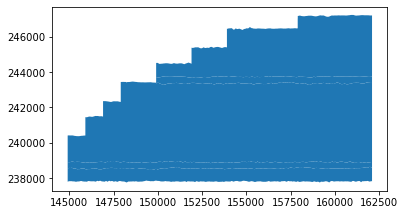

In [46]:
#Read Shape files
shape_df = gp.read_file('Data/DSM_Data/DHMVII_vdc_k01/DHMVII_vdc_k01.shp')
# print(geo_df)
x0 = shape_df.loc[1, 'geometry']
x0
shape_df.crs
# print(shape_df.crs)
# shape_df.head()

shape_df.plot()
plt.show()

In [ ]:
DTM_img = rasterio.open('Data/DTM_Data/DHMVIIDTMRAS1m_k01.tif', masked=True)
DTM_arr = DTM_img.read()
# show(DTM_img)
DSM_img = rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif', masked=True)
DSM_arr = DSM_img.read()

DBM_arr = DSM_arr - DTM_arr
x = DBM_arr[0]
x[1, 50000:10000]
# DBM_arr.shape

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x,y = np.meshgrid(range(17000), range(9000), indexing='ij')
z = DBM_arr[0]
# fig = plt.figure(figsize=(17, 9))
# ax = fig.add_subplot(111, projection="3d")
# ax.plot_trisurf(x,y,z)
plt.figure()
plt.scatter(x, y, z)
plt.show()

In [10]:
DTM_arr.shape
crs = DTM_img.crs
print(crs)

EPSG:31370


[[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
  [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
  [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
  ...
  [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
  [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.693e+01]
  [ 4.480e+00  4.550e+00  4.570e+00 ...  1.686e+01  1.688e+01  1.690e+01]]]


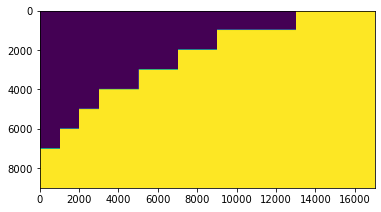

<AxesSubplot:>

In [25]:
print(DTM_arr)


In [3]:
DSM_img = rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif', masked=True)
DSM_arr = DSM_img.read()

# How many bands does this image have?
num_bands = DSM_img.count
print('Number of bands in image: {n}\n'.format(n=num_bands))
DSM_img.bounds   
# show(DTM_img)

Number of bands in image: 1



BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [20]:
DSM_img.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [5]:
print(DTM_arr.min(), DTM_arr.max())
DTM_arr.shape

-9999.0 33.27


(1, 9000, 17000)

In [5]:
DBM_arr = DSM_arr - DTM_arr
DBM_arr
DBM_arr.min()
DBM_arr.max()



91.4532

In [5]:
DBM_arr.shape

(1, 9000, 17000)

In [ ]:
import pandas as pd
df = pd.DataFrame(data=DBM_arr[0])
f, ax = plt.subplots()
df.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

In [ ]:
# fileDir = os.path.dirname(os.path.realpath('__file__'))
# print(fileDir) 
# with rasterio.open('DSM_Data/DHMVIIDSMRAS1m_k01.tif') as img:   
#     # print(img)
#     # print(img.width, img.height)     
#     show(img)

In [15]:
# with rasterio.drivers():

    # Read raster bands directly to Numpy arrays.
    #
with rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif') as src:
    x = 800 #(src.bounds.left + src.bounds.right) / 2
    y = 16000 #(src.bounds.bottom + src.bounds.top) / 2
    for val in src.sample([(x, y)]):
        print(val)

[14.59]
